##### Phase 2: Feature–Target Relationship Analysis

<small>**Objective**  
The goal of this phase is to analyze the relationship between key borrower and loan features
and the target variable (`loan_status`) to validate whether observed default patterns align
with real-world credit risk intuition.

Rather than relying on raw correlations or scatter plots, features are aggregated,
bucketized, and analyzed using default rates to identify meaningful and interpretable trends.</small>


##### Target Variable Definition<small>

- `loan_status = 1` : Defaulted loan  
- `loan_status = 0` : Non-defaulted loan  

In this analysis, **default rate** is computed as the mean of `loan_status`
within each bucket or category.</small>


##### Analysis Approach<small>

For each selected feature:
1. Create meaningful buckets or categories
2. Compute default rate per bucket
3. Visualize trends using bar charts
4. Validate whether trends are monotonic and logically consistent
5. Flag anomalies or counter-intuitive patterns for further investigation</small>


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("../data/raw/raw.csv")

In [24]:
df_raw = df.copy()

##### **Primary risk drivers**

<small>
Bucket boundaries were chosen based on domain intuition and validated using equal-sized (qcut) buckets to ensure observed trends are not artifacts of bin selection.
</small>


##### A. Loan to Income Ratio

Axes(0.125,0.11;0.775x0.77)
loan_to_income_ratio
0,1–0.25     16176
0–0.10        9886
0.25–0.40     5328
0.40–0.60     1139
0.60-1          52
>1               0
Name: count, dtype: int64


C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\3940297994.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status1 =  df_feat1.groupby('loan_to_income_ratio')['loan_status'].mean()


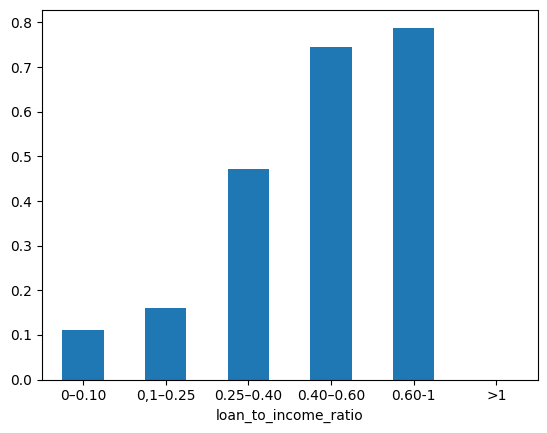

In [25]:

df_feat1 = df_raw.copy()
df_feat1['loan_burden'] = df_feat1['loan_amnt'] / df_feat1['person_income']

bins = [0, 0.1, 0.25, 0.4, 0.6, 1.0, np.inf]
labels = ['0–0.10', '0,1–0.25', '0.25–0.40', '0.40–0.60', '0.60-1','>1' ]
df_feat1['loan_to_income_ratio'] = pd.cut(df_feat1['loan_burden'], bins=bins, labels=labels)

mean_loan_status1 =  df_feat1.groupby('loan_to_income_ratio')['loan_status'].mean()
print(mean_loan_status1.plot(x='loan_to_income_ratio',y='mean',kind='bar',rot = 0,legend=False))
print(df_feat1['loan_to_income_ratio'].value_counts())



C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\1911444293.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status2 =  df_feat1.groupby('loan_to_income_ratio2')['loan_status'].mean()


<Axes: ylabel='loan_to_income_ratio2'>

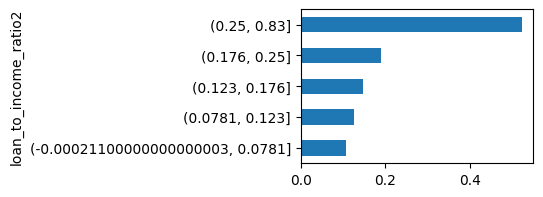

In [26]:
df_feat1['loan_to_income_ratio2'] = pd.qcut(df_feat1['loan_burden'], 5)
mean_loan_status2 =  df_feat1.groupby('loan_to_income_ratio2')['loan_status'].mean()
mean_loan_status2.plot(x='loan_to_income_ratio2',y='mean',kind='barh',rot = 0,legend=False, figsize=(3, 2))

<small>**Observation**

1. Loan burden (loan amount / income) shows a strong monotonic relationship with default probability.
2. Default rates increase gradually at lower burden levels and rise sharply beyond ratio 0.25.
3. Loan burden shows Similar monotonic trend under equal data point sized bucketing 
4. This behavior aligns with credit risk intuition, where higher repayment burden leads to higher default risk.


**Phase-2 Decision**

1. Retain loan_burden as a primary risk feature.</small>


##### **Proxy/Baseline features**

##### A. Employment Length

C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\3018533280.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status =  df_feat3.groupby('Emp_len_bracket')['loan_status'].mean()


Emp_len_bracket
4-8      9495
2-4      6330
8-12     3378
12-15     999
15-20     504
>20       111
Name: count, dtype: int64

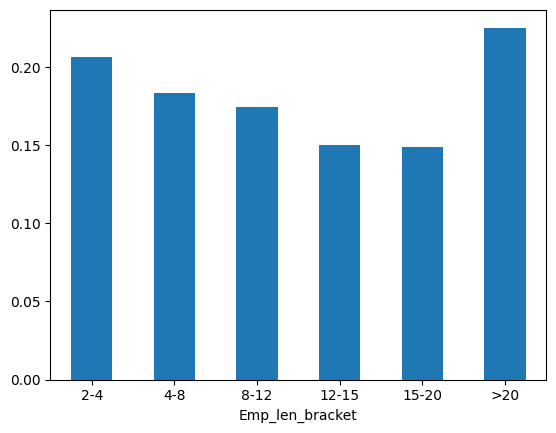

In [27]:
df_feat3 = df_raw.copy()
bins = [2,4, 8, 12, 15, 20, np.inf]
labels = ['2-4', '4-8', '8-12', '12-15', '15-20','>20' ]
df_feat3['Emp_len_bracket'] = pd.cut(df_feat3['person_emp_length'], bins=bins, labels=labels) 

mean_loan_status =  df_feat3.groupby('Emp_len_bracket')['loan_status'].mean()
mean_loan_status.plot(x='Emp_len_bracket',y='mean',kind='bar',rot = 0,legend=False)
df_feat3['Emp_len_bracket'].value_counts()

C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\2515656618.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status2 =  df_feat3.groupby('Emp_len_bracket2')['loan_status'].mean()


<Axes: xlabel='Emp_len_bracket2'>

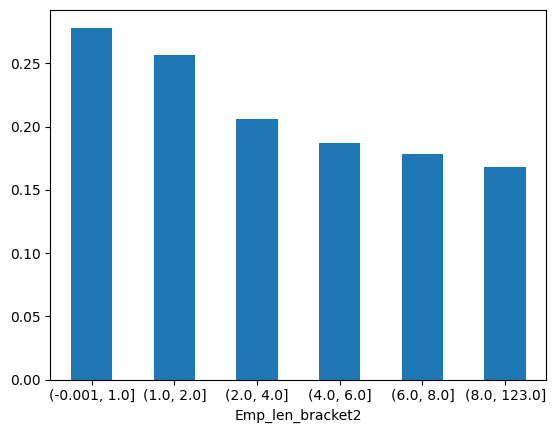

In [28]:

df_feat3['Emp_len_bracket2'] = pd.qcut(df_feat3['person_emp_length'], 6) 

mean_loan_status2 =  df_feat3.groupby('Emp_len_bracket2')['loan_status'].mean()
mean_loan_status2.plot(x='Emp_len_bracket2',y='mean',kind='bar',rot = 0,legend=False)

<small>**Observation**

1. Around 25% of data contains legal constaint violations, data robustness for length capping/ filtering must be checked accordingly
2. Monotonic trend is clearly visible under equal bucket sizing. Length>20 is abnormally high due to small data points
3. Default risk decreases from early career to mid-career employment lengths, indicating increasing financial stability.
4. At very high employment lengths, risk rises slightly, likely reflecting lifecycle effects such as reduced earning growth or retirement proximity.

**Phase-2 Decision**

1. Keep employment length as proxy/baseline indicator</small>


##### B. Default History

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

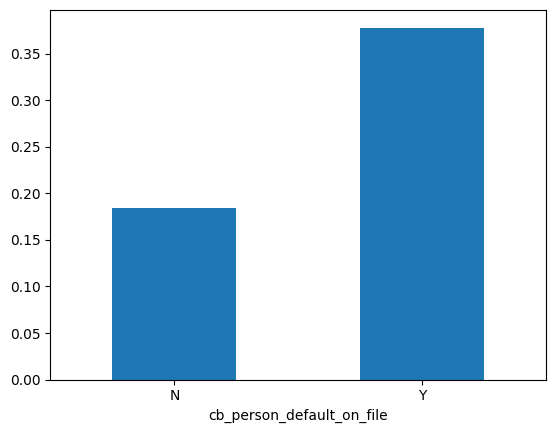

In [29]:
df_feat9 = df_raw.copy()
mean_loan_status =  df_feat9.groupby('cb_person_default_on_file')['loan_status'].mean()
mean_loan_status.plot(x='cb_person_default_on_file',y='mean',kind='bar',rot = 0,legend=False)
df_feat9['cb_person_default_on_file'].value_counts()

<small>**Observations**

1. Prior default individuals show more potential for risk

**Phase 2 decision**

1. Keep this as a proxy/baseline indicator </small>

##### **Contexual Features**

<small>Contextual features are analyzed for completeness and interaction potential, not as standalone risk drivers.</small>


##### A. Credit History Length


C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\2548842687.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status =  df_feat4.groupby('Cred_his_buckets')['loan_status'].mean()


Cred_his_buckets
2-4      11868
4-8       7541
8-12      4693
12-16     1823
16-20      478
>20        213
Name: count, dtype: int64

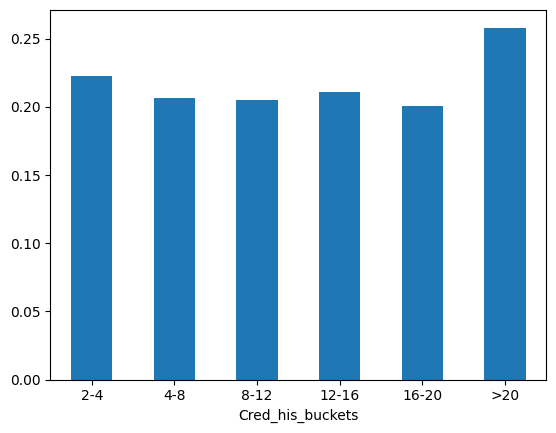

In [30]:
df_feat4 = df_raw.copy()
bins = [2,4, 8, 12, 16, 20, np.inf]
labels = ['2-4', '4-8', '8-12', '12-16', '16-20','>20' ]
df_feat4['Cred_his_buckets'] = pd.cut(df_feat4['cb_person_cred_hist_length'], bins=bins, labels=labels) 

mean_loan_status =  df_feat4.groupby('Cred_his_buckets')['loan_status'].mean()
mean_loan_status.plot(x='Cred_his_buckets',y='mean',kind='bar',rot = 0,legend=False)
df_feat4['Cred_his_buckets'].value_counts()

<small>**Observation**

1. No strong trend observed with variable credit history length
2. This may be because credit history length captures information depth but not repayment behavior, which is better represented by prior default flags
3. Credit history length may contribute marginal lift when combined with prior default indicators and loan burden.

**Phase-2 Decision**

1. Use credit history length as a contexual feature</small>


##### B. Person Age

C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\2884996415.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status =  df_feat2.groupby('Age_bracket')['loan_status'].mean()


Age_bracket
18-30    24824
30-40     6263
40-50     1206
50-60      218
60-70       57
>70         13
Name: count, dtype: int64

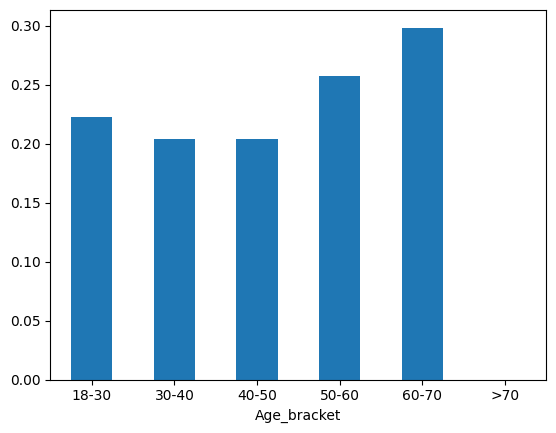

In [31]:
df_feat2 = df_raw.copy()
bins = [18,30, 40, 50, 60, 70, np.inf]
labels = ['18-30', '30-40', '40-50', '50-60', '60-70','>70' ]
df_feat2['Age_bracket'] = pd.cut(df_feat2['person_age'], bins=bins, labels=labels)

mean_loan_status =  df_feat2.groupby('Age_bracket')['loan_status'].mean()
mean_loan_status.plot(x='Age_bracket',y='mean',kind='bar',rot = 0,legend=False)
df_feat2['Age_bracket'].value_counts()

<small>**Observation**

1. Age shows a mild non-linear (U-shaped) relationship with default probability, suggesting age alone is not> a strong standalone<br> predictor but may add value through interactions
2. The magnitude of variation across age buckets is small compared to primary drivers such as loan burden and employment length

**Phase-2 Decision**

1. Use age as a contextual feature..</small>


##### C. Home Ownership 


person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

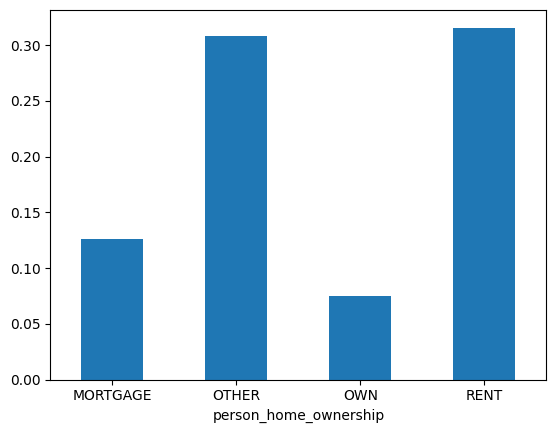

In [32]:
df_feat5 = df_raw.copy()
mean_loan_status =  df_feat5.groupby('person_home_ownership')['loan_status'].mean()
mean_loan_status.plot(x='person_home_ownership',y='mean',kind='bar',rot = 0,legend=False)
df_feat5['person_home_ownership'].value_counts()

##### D. Loan Intent

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

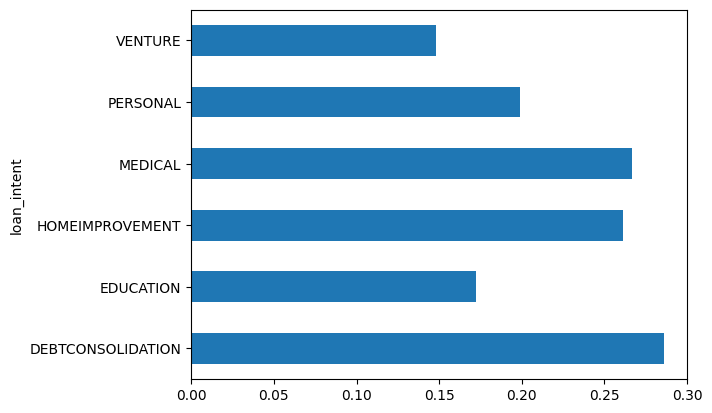

In [33]:
df_feat6 = df_raw.copy()
mean_loan_status =  df_feat6.groupby('loan_intent')['loan_status'].mean()
mean_loan_status.plot(x='loan_intent',y='mean',kind='barh',rot = 0,legend=False)
df_feat6['loan_intent'].value_counts()

##### E. Person Income(Individual)

C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\1705507616.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status =  df_feat7.groupby('Income_bracket')['loan_status'].mean()


Income_bracket
25k–50k      11613
50k–75k       9622
75k–100k      4670
100k–150k     3070
0–25k         2469
150k–300k      999
300k–1M        129
>1M              9
Name: count, dtype: int64

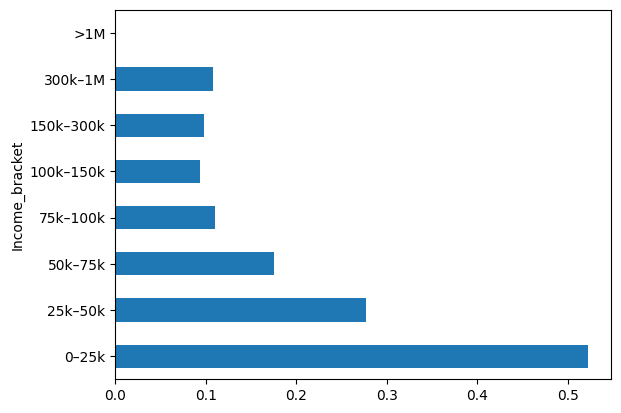

In [34]:
df_feat7 = df_raw.copy()
bins = [0, 25000, 50000, 75000, 100000, 150000, 300000, 1000000, float('inf')]
labels = [    '0–25k', '25k–50k', '50k–75k', '75k–100k','100k–150k', '150k–300k', '300k–1M', '>1M']

df_feat7['Income_bracket'] = pd.cut(df_feat7['person_income'], bins = bins, labels=labels) 

mean_loan_status =  df_feat7.groupby('Income_bracket')['loan_status'].mean()
mean_loan_status.plot(x='Income_bracket',y='mean',kind='barh',rot = 0,legend=False)
df_feat7['Income_bracket'].value_counts()

##### F. Loan Amount

C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\2588779108.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status =  df_feat8.groupby('Loan_bracket')['loan_status'].mean()


Loan_bracket
5k-10k     12040
0-5k        9489
10k-15k     6123
15k-20k     2789
20k-25k     1689
>25k         451
Name: count, dtype: int64

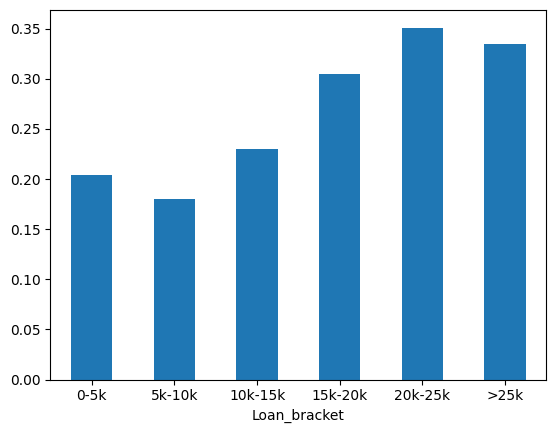

In [35]:
df_feat8 = df_raw.copy()
bins = [0, 5000, 10000, 15000, 20000, 25000, 35000]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '>25k']

df_feat8['Loan_bracket'] = pd.cut(df_feat8['loan_amnt'], bins = bins, labels=labels) 

mean_loan_status =  df_feat8.groupby('Loan_bracket')['loan_status'].mean()
mean_loan_status.plot(x='Loan_bracket',y='mean',kind='bar',rot = 0,legend=False)
df_feat8['Loan_bracket'].value_counts()

##### G. Employment Stability


Axes(0.125,0.11;0.775x0.77)
emp_stability_ratio
0,1–0.25     10375
0–0.10        7913
0.25–0.40     7162
0.40–0.60     2103
0.60-1          26
>1               2
Name: count, dtype: int64


C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\3715142413.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status1 =  df_feat10.groupby('emp_stability_ratio')['loan_status'].mean()


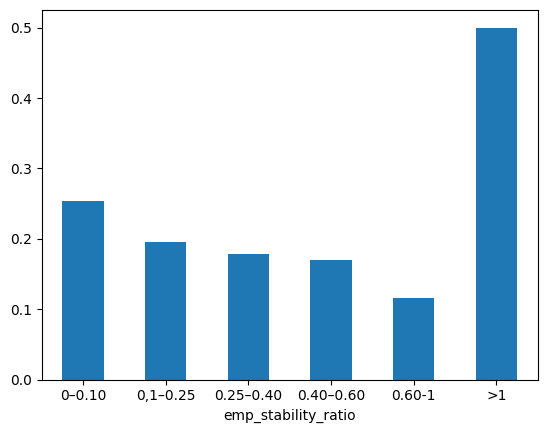

In [36]:
df_feat10 = df_raw.copy()
df_feat10['emp_stability'] = (df_feat10['person_emp_length'] / df_feat10['person_age'])

bins = [0, 0.1, 0.25, 0.4, 0.6, 1.0, np.inf]
labels = ['0–0.10', '0,1–0.25', '0.25–0.40', '0.40–0.60', '0.60-1','>1' ]
df_feat10['emp_stability_ratio'] = pd.cut(df_feat10['emp_stability'], bins=bins, labels=labels)

mean_loan_status1 =  df_feat10.groupby('emp_stability_ratio')['loan_status'].mean()
print(mean_loan_status1.plot(x='emp_stability_ratio',y='mean',kind='bar',rot = 0,legend=False))
print(df_feat10['emp_stability_ratio'].value_counts())

<small>**Observations**

**General contextual patterns**
1. Several contextual features are informative primarily in combination with dominant drivers rather than as standalone predictors.
2. Income and loan amount are retained indirectly through the loan-to-income ratio to avoid redundancy and multicollinearity.

**Feature-specific insight**

3. Employment stability shows a strong monotonic relationship with default probability; however, it is treated as a contextual interaction<br> feature since its interpretation depends on both age and employment length.

**Phase 2 Decision**  
1. Contextual features will be included in modeling as categorical or interaction features rather than primary drivers.</small>


##### **Data Robustness Checks**

##### A. Employment length

C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\2671737225.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status =  df_clean.groupby('Emp_len_bracket')['loan_status'].mean()


Emp_len_bracket
2-4      6236
4-8      5043
8-12     1097
12-15     367
15-20     205
>20        33
Name: count, dtype: int64

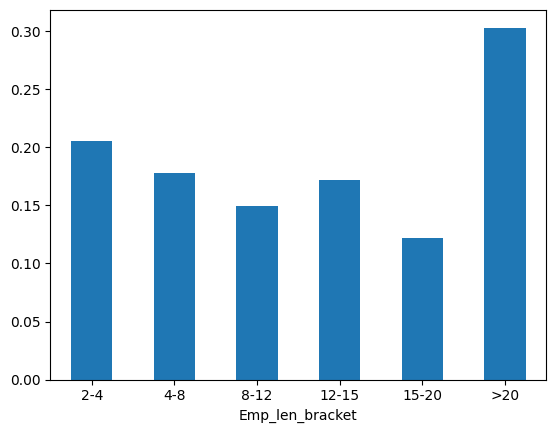

In [37]:
bins = [2,4, 8, 12, 15, 20, np.inf]
labels = ['2-4', '4-8', '8-12', '12-15', '15-20','>20' ]
df_clean = df_feat3[df_feat3['person_emp_length']<= df_feat3['person_age']-18].copy()
df_clean['Emp_len_bracket'] = pd.cut(df_clean['person_emp_length'], bins=bins, labels=labels) 

mean_loan_status =  df_clean.groupby('Emp_len_bracket')['loan_status'].mean()
mean_loan_status.plot(x='Emp_len_bracket',y='mean',kind='bar',rot = 0,legend=False)
df_clean['Emp_len_bracket'].value_counts()


C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\3021803275.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status2 =  df_clean.groupby('Emp_len_bracket2')['loan_status'].mean()


<Axes: xlabel='Emp_len_bracket2'>

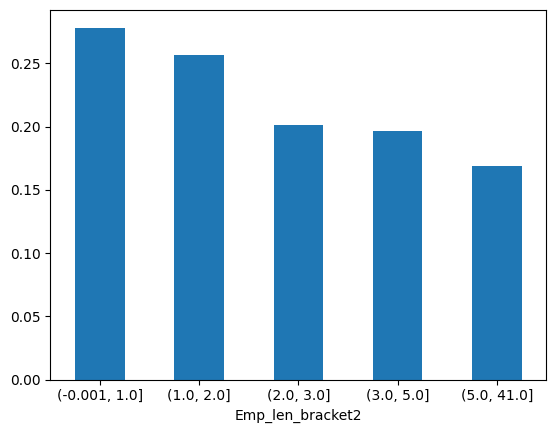

In [38]:
df_clean['Emp_len_bracket2'] = pd.qcut(df_clean['person_emp_length'], 5) 

mean_loan_status2 =  df_clean.groupby('Emp_len_bracket2')['loan_status'].mean()
mean_loan_status2.plot(x='Emp_len_bracket2',y='mean',kind='bar',rot = 0,legend=False)


C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\844222497.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status =  df_clean2.groupby('Emp_len_bracket')['loan_status'].mean()


Emp_len_bracket
4-8      8933
2-4      8333
8-12     2416
12-15     690
15-20     363
>20        69
Name: count, dtype: int64

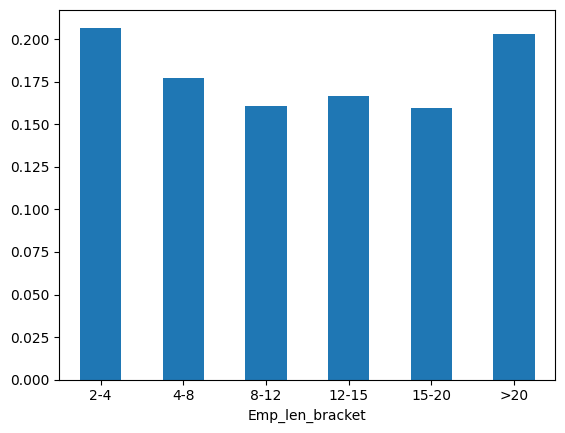

In [39]:
bins = [2,4, 8, 12, 15, 20, np.inf]
labels = ['2-4', '4-8', '8-12', '12-15', '15-20','>20' ]
df_clean2 = df_feat3.copy()
mask = df_clean2['person_emp_length'] > (df_clean2['person_age'] - 18)
df_clean2.loc[mask, 'person_emp_length'] = df_clean2.loc[mask, 'person_age'] - 18
df_clean2['Emp_len_bracket'] = pd.cut(df_clean2['person_emp_length'], bins=bins, labels=labels) 

mean_loan_status =  df_clean2.groupby('Emp_len_bracket')['loan_status'].mean()
mean_loan_status.plot(x='Emp_len_bracket',y='mean',kind='bar',rot = 0,legend=False)
df_clean2['Emp_len_bracket'].value_counts()

C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\540720805.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status =  df_clean2.groupby('Emp_len_bracket')['loan_status'].mean()


<Axes: xlabel='Emp_len_bracket'>

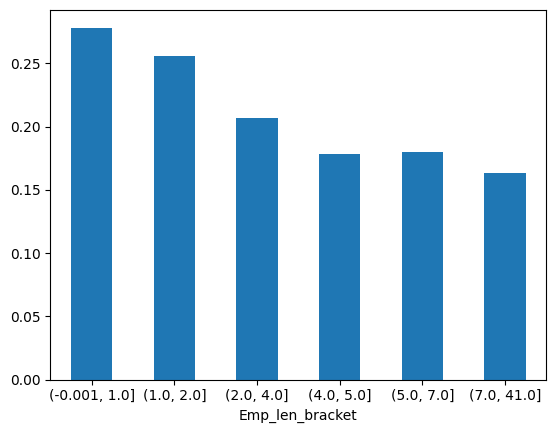

In [40]:
df_clean2['Emp_len_bracket'] = pd.qcut(df_clean2['person_emp_length'],6) 

mean_loan_status =  df_clean2.groupby('Emp_len_bracket')['loan_status'].mean()
mean_loan_status.plot(x='Emp_len_bracket',y='mean',kind='bar',rot = 0,legend=False)


<small>**Observation**

1. Employment length under filtering and length capping(age-18) shows similar monotonic trend

**Phase 2 Decision**

1. Employment length clears data robustness checks and can be used as a strong proxy/baseline indicator </small>

##### B. Employment Stability 

C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\678760275.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status =  df_clean.groupby('emp_stability_ratio')['loan_status'].mean()


emp_stability_ratio
0,1–0.25     9575
0–0.10       7913
0.25–0.40    1928
0.40–0.60     329
0.60-1          0
>1              0
Name: count, dtype: int64

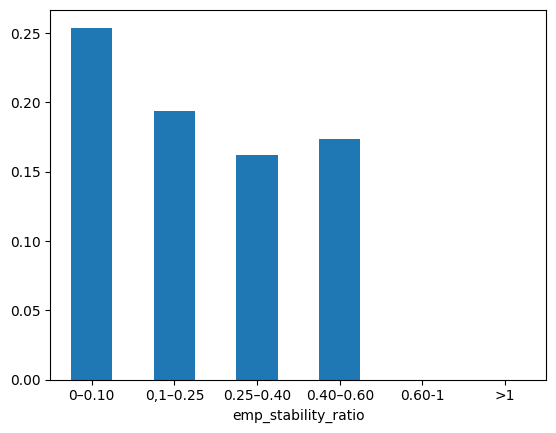

In [41]:
bins = [0, 0.1, 0.25, 0.4, 0.6, 1.0, np.inf]
labels = ['0–0.10', '0,1–0.25', '0.25–0.40', '0.40–0.60', '0.60-1','>1' ]
df_clean = df_feat10[df_feat10['person_emp_length']<= df_feat10['person_age']-18].copy()

df_clean['emp_stability'] = (df_clean['person_emp_length'] / df_clean['person_age'])
df_clean['emp_stability_ratio'] = pd.cut(df_clean['emp_stability'], bins=bins, labels=labels) 

mean_loan_status =  df_clean.groupby('emp_stability_ratio')['loan_status'].mean()
mean_loan_status.plot(x='emp_stability_ratio',y='mean',kind='bar',rot = 0,legend=False)
df_clean['emp_stability_ratio'].value_counts()

C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\121214904.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status =  df_clean.groupby('emp_stability_ratio')['loan_status'].mean()


<Axes: ylabel='emp_stability_ratio'>

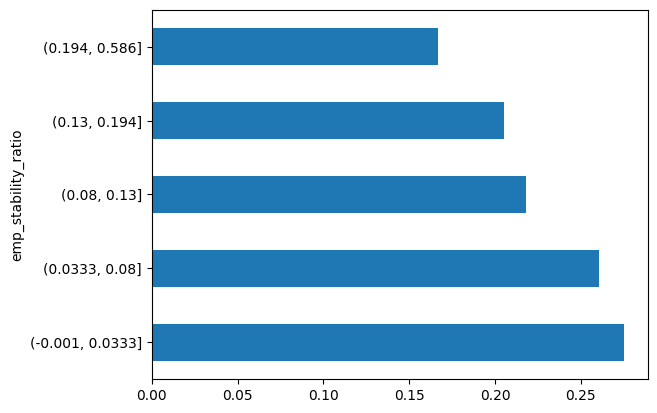

In [42]:
df_clean['emp_stability_ratio'] = pd.qcut(df_clean['emp_stability'], 5) 

mean_loan_status =  df_clean.groupby('emp_stability_ratio')['loan_status'].mean()
mean_loan_status.plot(x='emp_stability_ratio',y='mean',kind='barh',rot = 0,legend=False)

C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\2163755591.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status =  df_clean2.groupby('emp_stability_ratio')['loan_status'].mean()


emp_stability_ratio
0,1–0.25     10375
0–0.10        7913
0.25–0.40     7162
0.40–0.60     2103
0.60-1          26
>1               2
Name: count, dtype: int64

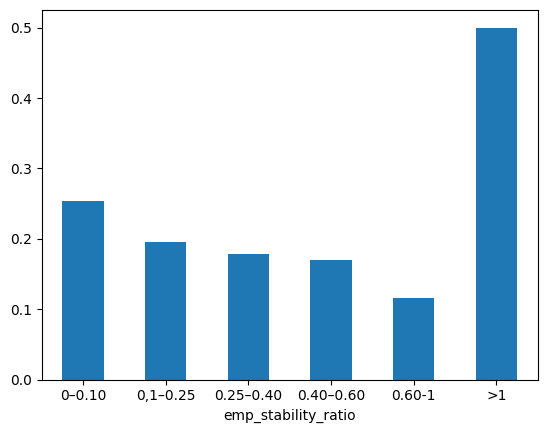

In [43]:
df_clean2 = df_feat10.copy()
mask = df_clean2['person_emp_length'] > (df_clean2['person_age'] - 18)
df_clean2.loc[mask, 'person_emp_length'] = df_clean2.loc[mask, 'person_age'] - 18
df_clean2['emp_stability_ratio'] = pd.cut(df_clean2['emp_stability'], bins=bins, labels=labels) 

mean_loan_status =  df_clean2.groupby('emp_stability_ratio')['loan_status'].mean()
mean_loan_status.plot(x='emp_stability_ratio',y='mean',kind='bar',rot = 0,legend=False)
df_clean2['emp_stability_ratio'].value_counts()

C:\Users\jayra\AppData\Local\Temp\ipykernel_29264\314057479.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_loan_status =  df_clean2.groupby('emp_stability_ratio')['loan_status'].mean()


<Axes: ylabel='emp_stability_ratio'>

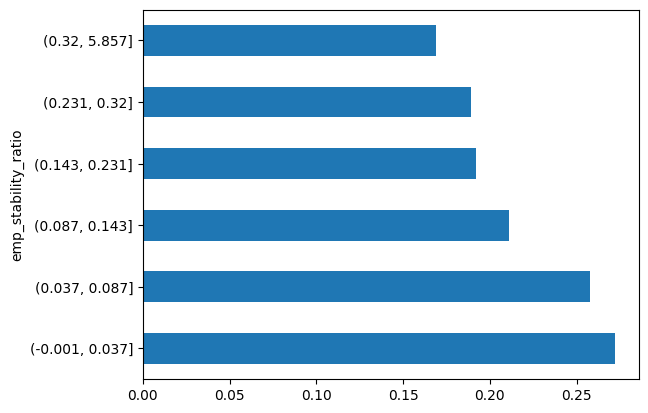

In [44]:
df_clean2['emp_stability_ratio'] = pd.qcut(df_clean2['emp_stability'], 6) 

mean_loan_status =  df_clean2.groupby('emp_stability_ratio')['loan_status'].mean()
mean_loan_status.plot(x='emp_stability_ratio',y='mean',kind='barh',rot = 0,legend=False)

<small>**Observation**

1. Employment stability under filtering  and length capping(age-18) shows similar monotonic trend
2. Considering that employment stability also provides ratios greater than(impossible), makes logical sense to preceed with<br> filtering for employment length

**Phase 2 Decision**

1. Employment stability clears data robustness checks and can be used as a strong contexual indicator </small>

##### Phase-2 Feature Strength Summary<small>

| Feature | Strength | Role |
|------|--------|-----|
| Loan-to-income ratio | Very strong | **Primary dominant risk driver** |
| Employment length | Strong | **Proxy risk indicator** |
| Prior default history | Strong | **Proxy risk indicator** |
| Employment stability (emp_length / age) | Strong |Contextual / interaction|
| Age | Weak | Contextual |
| Credit history length | Weak | Contextual |
| Home ownership | Contextual | Categorical context |
| Loan intent | Contextual | Categorical context |
| Income | Contextual | Used via ratio |
| Loan amount | Contextual | Used via ratio |

</small>


##### Phase-2 Limitations<small>

1. Phase-2 analysis is univariate and bucket-based.
2. Feature interactions and multicollinearity are not yet accounted for.
3. Final feature importance will be validated during model training
   using coefficients, SHAP values, and out-of-sample performance.</small>
